In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
from string import punctuation
import string
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [4]:
!pip install wordcloud

In [2]:
train = pd.read_csv(r'C:/Users/samri/OneDrive - Shri Vile Parle Kelavani Mandal/Desktop/sem 3 project/train.csv')
test = pd.read_csv(r'C:/Users/samri/OneDrive - Shri Vile Parle Kelavani Mandal/Desktop/sem 3 project/test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [5]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
train.shape

(7613, 5)

In [19]:
7613/6

1268.8333333333333

In [17]:
train.describe(include = 'all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [8]:
test.shape

(3263, 4)

In [9]:
test.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

In [10]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [11]:
test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [12]:
test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

0    4342
1    3271
Name: target, dtype: int64


C:\Users\samri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'samples')

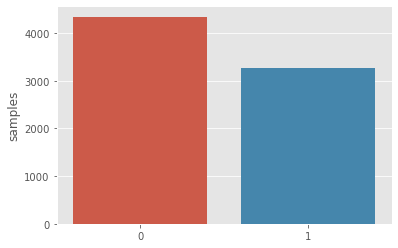

In [10]:
# Distribution of real disasters and not in train data
x=train.target.value_counts()
print(x)
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

In [ ]:
train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

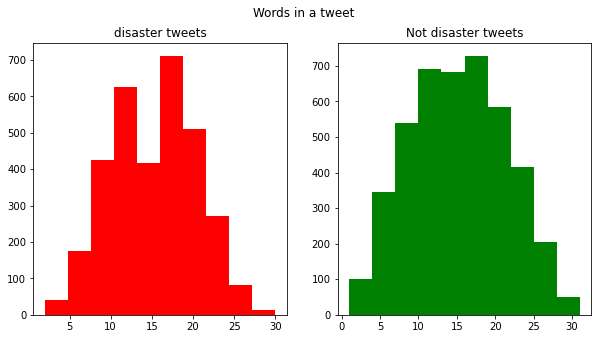

In [51]:
# Number of words in a tweet in the train data
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

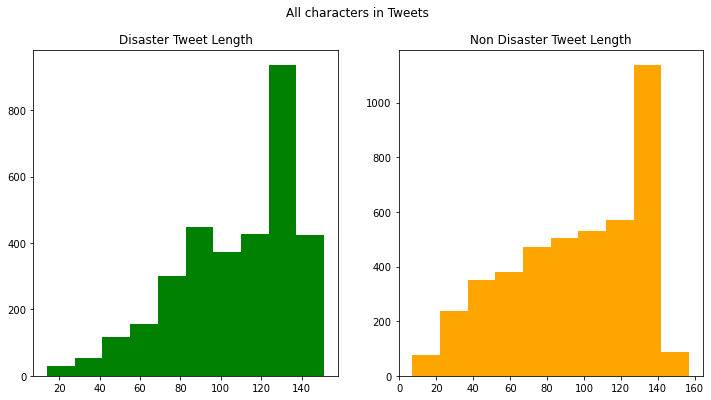

In [52]:
# Count of characters in disaster and non disaster tweets in train data
disaster_tweet_len = train[train['target']==1]['text'].str.len()
non_disaster_tweet_len = train[train['target']==0]['text'].str.len()
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(disaster_tweet_len, color='green')
ax[0].set_title("Disaster Tweet Length")
ax[1].hist(non_disaster_tweet_len, color='orange')
ax[1].set_title("Non Disaster Tweet Length")
fig.suptitle('All characters in Tweets')
plt.show()

C:\Users\samri\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samri\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each tweet')

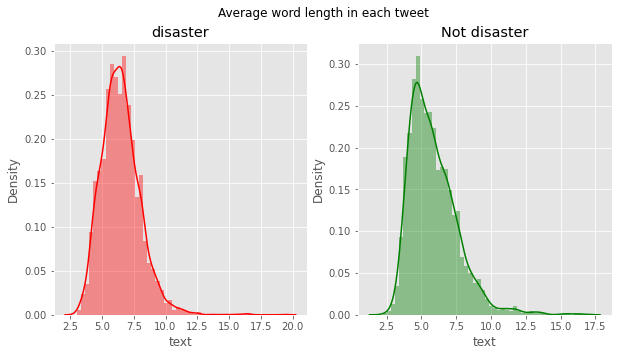

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train[train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=train[train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

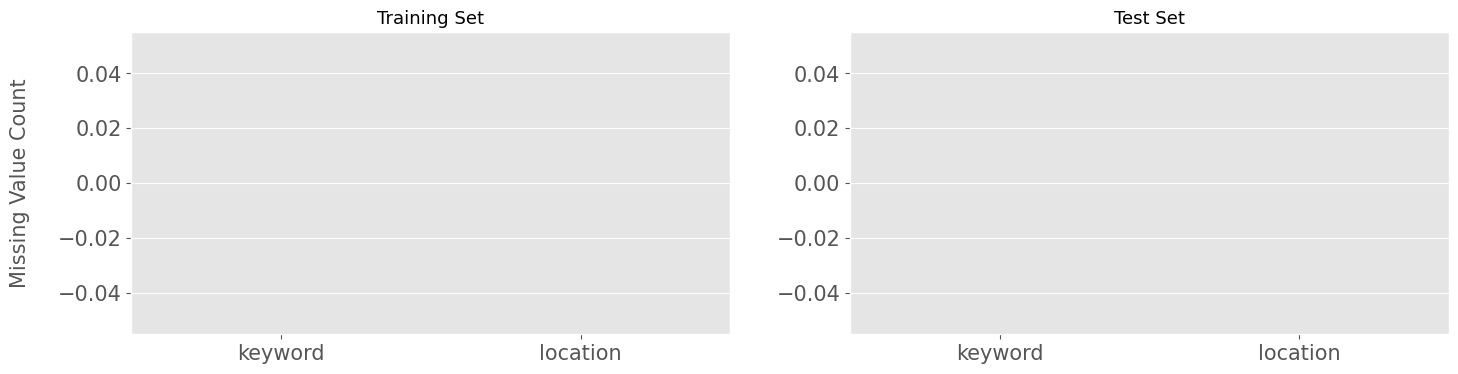

In [78]:
# Distribution of na values in train and test data
missing_cols = ['keyword', 'location']
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
sns.barplot(x=train[missing_cols].isnull().sum().index, y=train[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=test[missing_cols].isnull().sum().index, y=test[missing_cols].isnull().sum().values, ax=axes[1])
axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)
axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)
plt.show()
for df in [train, test]:    
    for col in ['keyword', 'location']:       
        df[col] = df[col].fillna(f'no_{col}')

In [6]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 20

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in train[train['target']==1]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in train[train['target']==0]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in train[train['target']==1]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1

for tweet in train[train['target']==0]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])


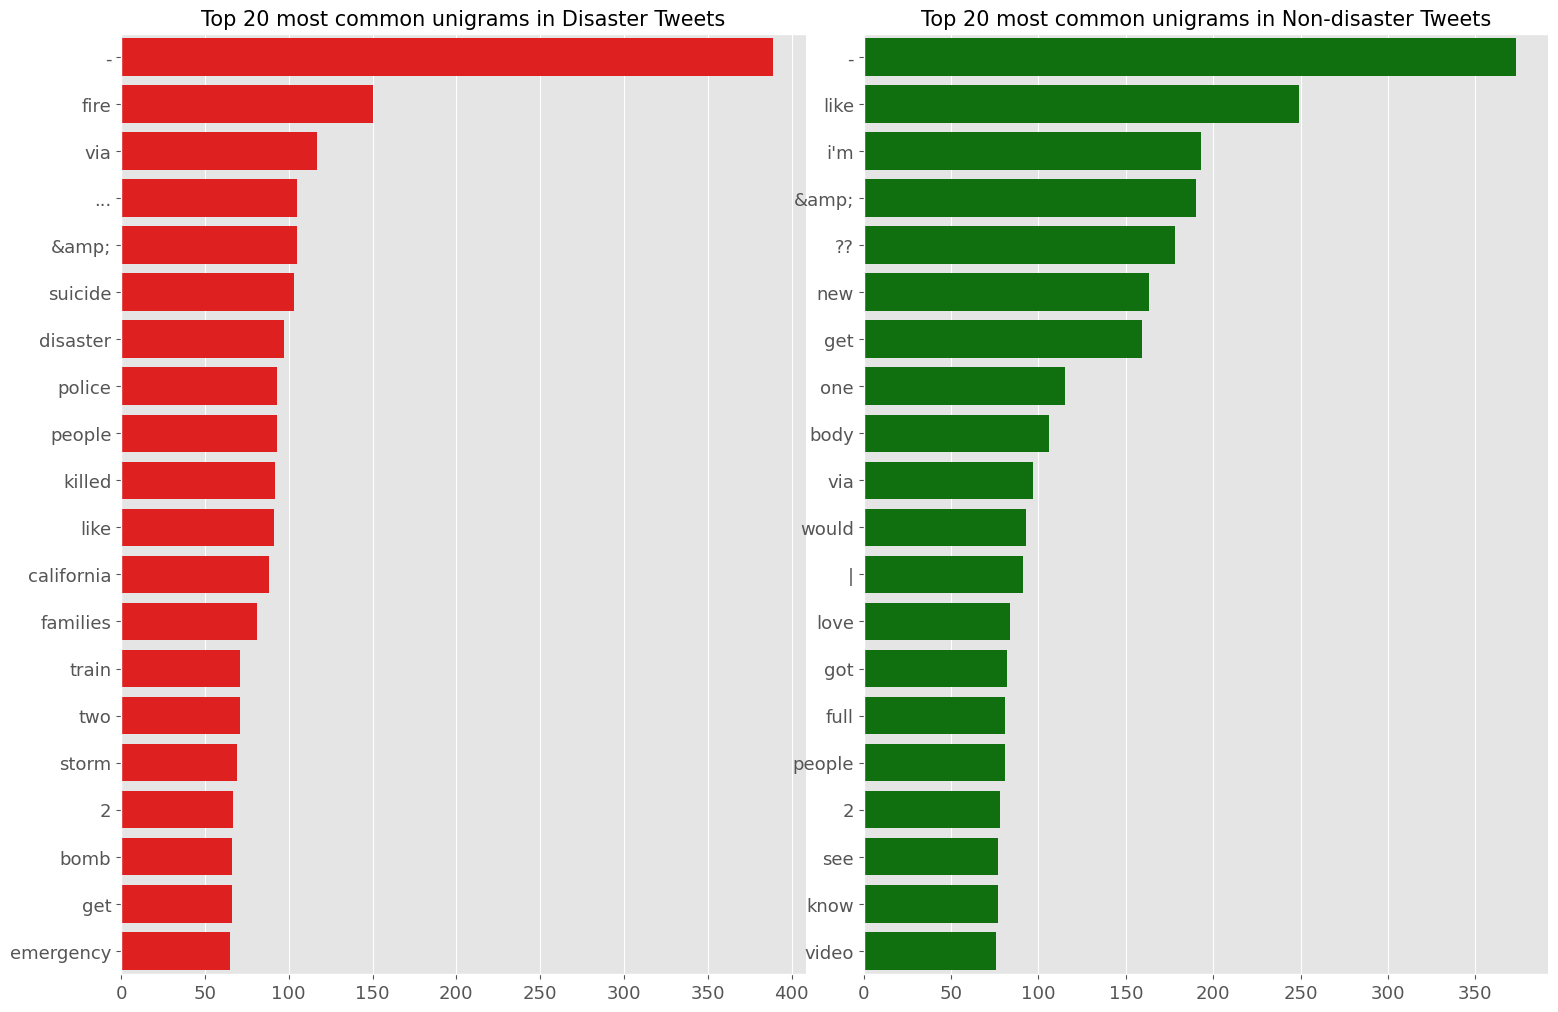

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)
plt.show()

C:\Users\samri\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samri\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


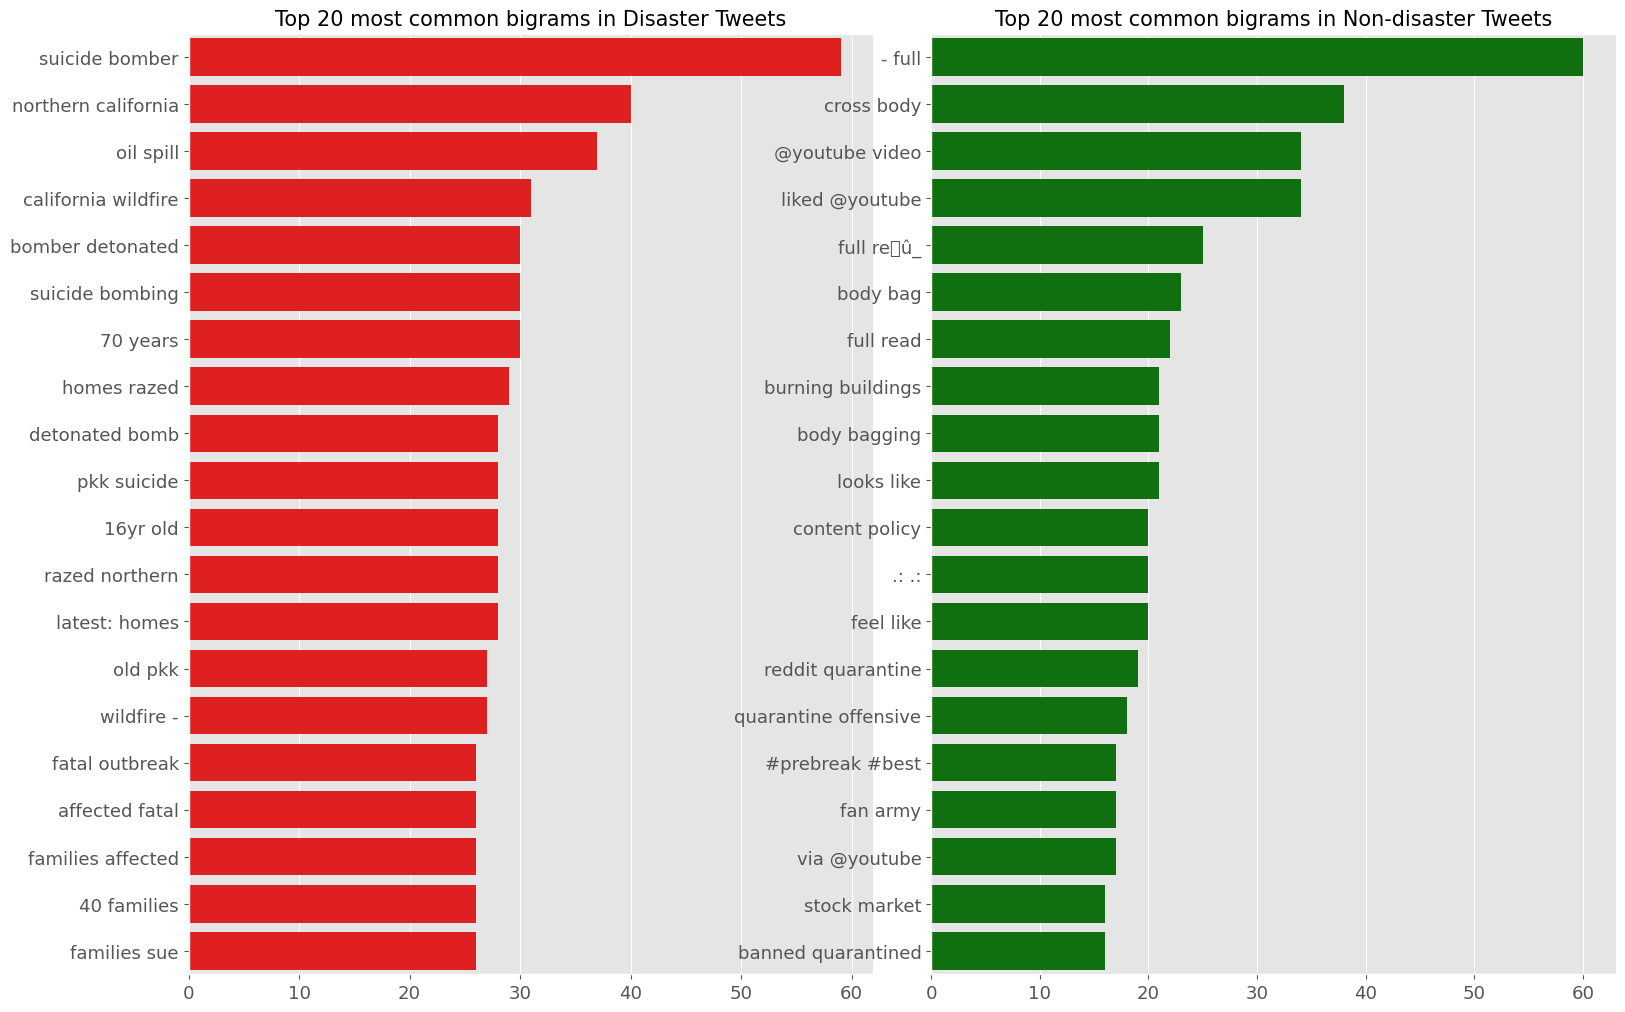

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [28]:
# Data Cleaning
df=pd.concat([train,test])
df.shape

(10876, 5)

In [29]:
# removing urls
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
df['text']=df['text'].apply(lambda x : remove_URL(x))

In [30]:
# removing html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['text']=df['text'].apply(lambda x : remove_html(x))

In [31]:
# removing emojis
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [32]:
# removing punctuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
df['text']=df['text'].apply(lambda x : remove_punct(x))

In [36]:
# lemmatizing
import nltk
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [38]:
#stemming
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

df['text'] = df['text'].apply(lambda x: stemming_on_text(x))

In [8]:
# tokenise
'''def tokenize(text):
    split=re.split("\W+",text) 
    return split
df['text']=df['text'].apply(lambda x: tokenize(x.lower()))
df.head()
'''

,id,keyword,location,text,target
0,1,NaN,NaN,"[our, deeds, are, the, reason, of, this, earth...",1.0
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1.0
2,5,NaN,NaN,"[all, residents, asked, to, shelter, in, place...",1.0
3,6,NaN,NaN,"[13000, people, receive, wildfires, evacuation...",1.0
4,7,NaN,NaN,"[just, got, sent, this, photo, from, ruby, ala...",1.0


In [54]:
# removing stop words
'''def remove_stopwords(text):
    text=[word for word in text if word not in stop]
    return text
df['text']=df['text'].apply(lambda x: remove_stopwords(x))
df.head()
'''

,id,keyword,location,text,target
0,1,NaN,NaN,"[O, u, r, , D, e, e, , r, e, , h, e, , R, ...",1.0
1,4,NaN,NaN,"[F, r, e, , f, r, e, , n, e, r, , L, , R, ...",1.0
2,5,NaN,NaN,"[A, l, l, , r, e, e, n, , k, e, , , h, e, ...",1.0
3,6,NaN,NaN,"[1, 3, 0, 0, 0, , p, e, p, l, e, , r, e, c, ...",1.0
4,7,NaN,NaN,"[J, u, , g, , e, n, , h, , p, h, , f, r, ...",1.0


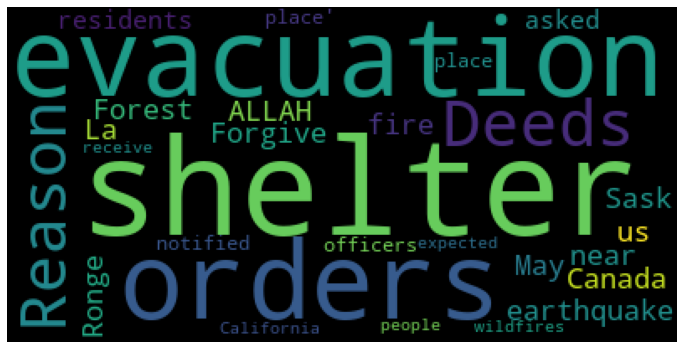

In [31]:
# word cloud for real disasters for train data
def create_corpus_df(tweet, target):
    corpus=[]

    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus_new1=create_corpus_df(train,1)
len(corpus_new1)

plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new1[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

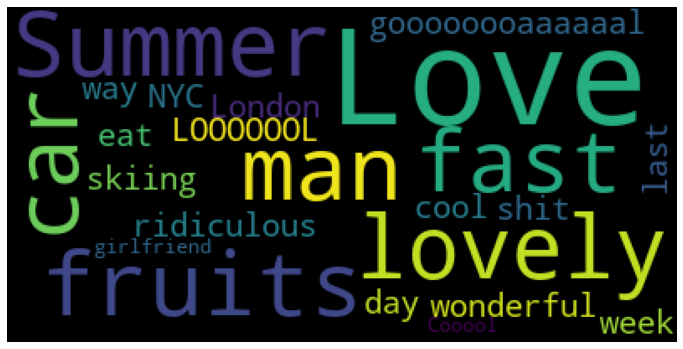

In [32]:
# word cloud for non disasters in train data
corpus_new2=create_corpus_df(train,0)

plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new2[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
figure GloVe for Vectorization
BERT Layer


In [39]:
train_data = df.iloc[:7613,:]
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1.0
2,5,NaN,NaN,All residents asked to shelter in place are be...,1.0
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1.0
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1.0
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1.0
7609,10870,NaN,NaN,ariaahrary TheTawniest The out of control wild...,1.0
7610,10871,NaN,NaN,M194 0104 UTC5km S of Volcano Hawaii,1.0
7611,10872,NaN,NaN,Police investigating after an ebike collided w...,1.0


In [40]:
test_data = df.iloc[7613:,:4]
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,Heard about earthquake is different cities sta...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane My citya...
3260,10868,NaN,NaN,Green Line derailment in Chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook HWO


In [41]:
X_train = train_data.iloc[:,3]
X_train
y_train = train_data['target']

In [42]:
X_train
y_train

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7608    1.0
7609    1.0
7610    1.0
7611    1.0
7612    1.0
Name: target, Length: 7613, dtype: float64

In [43]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(test_data)
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<7613x17798 sparse matrix of type '<class 'numpy.float64'>'
	with 97625 stored elements in Compressed Sparse Row format>

In [45]:
#Ridge Regression
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, X_train_dtm, y_train, cv=3, scoring="f1")
scores

RidgeClassifier()

In [46]:
scores

array([0.61409043, 0.55114201, 0.61568627])

In [47]:
clf.fit(X_train_dtm, y_train)
clf.predict(X_test_dtm)

array([0., 0., 0., 0.])

In [52]:
# Glove
from tqdm import tqdm
def create_corpus_new(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet)]
        corpus.append(words)
    return corpus

In [53]:
corpus=create_corpus_new(df)

100%|██████████████████████████████████████████████████████████████████████████| 10876/10876 [00:01<00:00, 5908.89it/s]


In [63]:
# !pip install keras
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
# from keras.optimizers import Adam

ModuleNotFoundError: No module named 'torch'

In [61]:
!pip install tensorflow

  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=fa0ba17b0d6bbf33d3cc0ed820e4fee637740f2a8f0234c3efe2879fd6d72fc4
  Stored in directory: c:\users\samri\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30710 sha256=f7a83e319e200542a2a8ecec8bfd011bdd3670782692f5bd4271a0cfd7fae115
  Stored in directory: c:\users\samri\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=4c8293cb18c8fd1400a1421b9b6e4ae8ddb9315847ce467fd17c430025c236d5
  Stored in directory: c:\users\samri\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt clang termcolor
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully

In [80]:
!pip install gensim

In [81]:
import gensim

In [82]:
embedding_dict={}
with open('../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word = values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

FileNotFoundError: [Errno 2] No such file or directory: '../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt'

In [68]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [69]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 22807


In [70]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i < num_words:
        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec           

100%|████████████████████████████████████████████████████████████████████████| 22807/22807 [00:00<00:00, 693581.77it/s]


In [74]:
#LSTM

from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           2280800   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,323,105
Trainable params: 42,305
Non-trainable params: 2,280,800
_________________________________________________________________


In [83]:
history=model.fit(X_train_dtm,y_train,batch_size=4,epochs=10,validation_data=(X_test_dtm,y_test),verbose=2)

NameError: name 'y_test' is not defined

In [ ]:
train_pred_GloVe = model.predict(train)
train_pred_GloVe_int = train_pred_GloVe.round().astype('int')